In [1]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Data generation - We want to estimate lambda, but this cell generates data from a Poisson(lambda=3) RV
# Aim to see a "mountain" in density/probability around lambda=3 in the posterior.
N = 50
truelambda = 3
data = stats.poisson.rvs(truelambda, size=N)
data
# The statistical model doesn't see the true value of lambda, just the data

array([1, 4, 3, 1, 2, 2, 3, 2, 4, 1, 4, 3, 1, 1, 2, 5, 0, 4, 1, 2, 2, 3,
       4, 2, 2, 0, 3, 3, 3, 2, 3, 2, 3, 4, 2, 5, 1, 3, 3, 2, 3, 3, 2, 6,
       3, 2, 7, 4, 4, 6])

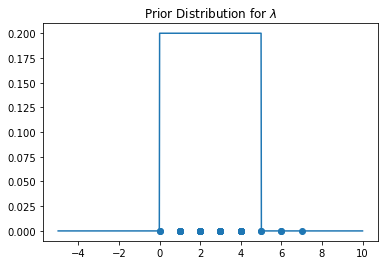

In [3]:
# Consider a uniform prior between 0 and 5. 
%matplotlib inline
x =  np.linspace(-5,10,1000)
unix = stats.uniform.pdf(x,0,5)
plt.title("Prior Distribution for $\lambda$")
plt.plot(x,unix)
plt.scatter(data,np.zeros(N))

Text(0.5, 1.0, 'Posterior Distribution for $\\lambda$')

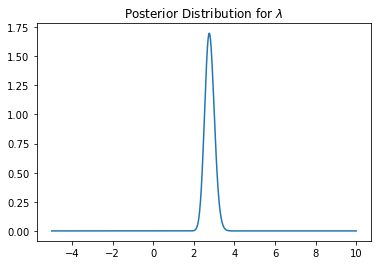

In [4]:
# Want to calculate the posterior, using the definition of a conditional distribution
# p(theta|y) = p(y|theta)p(theta)/p(y)
# The denominator is independent of theta, so can be considered to be a normalisation factor
# p(theta) is the prior density for theta, which I have plotted above (held in unix). p(y|theta) is the likelihood function.
likelihood = np.array([stats.poisson.pmf(data,_x) if _x > 0 else np.zeros(N) for _x in x]).prod(axis=1)
plt.plot(x, likelihood*unix/np.trapz(likelihood*unix, x))
plt.title("Posterior Distribution for $\lambda$")